# INTRODUCTION




 __The below dataset provides details about chest cancer, and I am using that dataset to detect chest cancer using CNN.__


# DATASET LOCATION: 

__This dataset was taken from Kaggle from the following link: https://www.kaggle.com/datasets/mohamedhanyyy/chest-ctscan-images__

# Information about the dataset:

1) __Dataset name : Chest CT-Scan images__
2) __Name of classes: adenocarcinoma, large cell carcinoma, squamous cell carcinoma and normal__
3) __Total number of training data : 1000 images corresponding to 4 classes__


# Business Problem statement:

__A small hospital in a town is currently getting a lot of chest problematic patients admitted and as a result, the hospital is facing a serious nurse shortage; moreover, the hospital does not have more money for recruiting new nurses; therefore, that hospital's CEO started to fund in convolutional neural network (CNN) AI technology, which is image classification technology that can predict based on CT scans if the patients have chest cancer or not. By implementing such a technology in the hospital, the hospital can save so much money by not recruiting nurses. Apart from that, human error will be minimised because of that technology, and also predictions like which cancer type the patients have can also be identified by that technology. As a result, the hospital can save a lot of time by only administering proper treatment for the particular type of cancer the pateints have.__     



# GOAL

1) __The main goal to implement this technology is to minimise human error and precise evaluation     of which type of cancer patients have and will also cut the cost in recruiting of the nurses.__
2) __Using CNN, which is advanced image detection technology we can achieve good accuracy and         implement this technology in the hospital without any issue.__ 

_Importing vital libraries_

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Rescaling
import os
import PIL
from tensorflow import keras
import keras_tuner as kk
from keras_tuner.engine.hyperparameters import HyperParameters
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import glob
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
import json
from tensorflow.keras.models import Sequential
from kerastuner import HyperModel
import pathlib
from tensorflow.keras import layers
import pandas as pd
from IPython.display import display





C:\Users\santos\AppData\Local\Temp\ipykernel_12748\1202092722.py:15: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import HyperModel


_Reading the image data and saving in the respective variables._

In [3]:
training_datas = r"D:\archive (1)\Data\train"
testing_datas = r"D:\archive (1)\Data\test" 
valing_datas = r"D:\archive (1)\Data\valid"


_The function counts images from train, test and val and also give number of images per class. Its useful because we can check if there is any imbalace between classess._


In [4]:
def count_images_in_dataset(ds):
    counting_class = {}
    for images, labels in ds:
        for label in labels.numpy():
            counting_class[label] = counting_class.get(label, 0) + 1
    return counting_class


_The below function preprocesses the data by loading it into a TensorFlow dataset. It also resizes the images to 180x180 pixels, batches them into groups of 32, and implicitly splits the features (X) and labels (Y) for the train, test, and validation datasets.It also has random seed for reproducibility.._ 

In [5]:
training_data = tf.keras.preprocessing.image_dataset_from_directory(
    training_datas,
    seed=123,
    image_size=(180, 180),  
    batch_size=32) 

Found 613 files belonging to 4 classes.


In [6]:
testesting_data = tf.keras.preprocessing.image_dataset_from_directory(
    testing_datas,
    image_size=(180, 180),
    batch_size=32
)

Found 315 files belonging to 4 classes.


In [7]:
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    valing_datas,
    seed=123,
    image_size=(180, 180),
    batch_size=32
)

Found 72 files belonging to 4 classes.


In [8]:
counting_training = count_images_in_dataset(training_data)
print("Training Set Class Counts:", counting_training)

counting_val = count_images_in_dataset(val_data)
print("Validation Set Class Counts:", counting_val)

counting_test = count_images_in_dataset(testesting_data)
print("Test Set Class Counts:", counting_test)


Training Set Class Counts: {2: 148, 0: 195, 3: 155, 1: 115}
Validation Set Class Counts: {0: 23, 2: 13, 3: 15, 1: 21}
Test Set Class Counts: {0: 120, 3: 90, 1: 51, 2: 54}


_Below I created a function to visualise percentages to represent class distribution because it provides a normalized view of the data, making it easier for me to compare the proportions of each classes across the different datasets, which are train, test, and validation, regardless of their total size. Based on the output, we can see if theere is any data imbalance._

In [9]:
def class_distribution(counting_class):
    total = sum(counting_class.values())
    total_number_of_percent = {}
    
    for cls, ss in counting_class.items():
        percent = ss / total * 100
        total_number_of_percent[cls] = round(percent, 2)
    
    return total_number_of_percent

train_total_percent = class_distribution(counting_training)
print("Training Set Class Percentages:")
print(train_total_percent)

test_total_percent = class_distribution(counting_test)
print("Testing Set Class Percentages:")
print(test_total_percent)

validation_total_percent = class_distribution(counting_val)
print("validation Set Class Percentages:")
print(validation_total_percent)



Training Set Class Percentages:
{2: 24.14, 0: 31.81, 3: 25.29, 1: 18.76}
Testing Set Class Percentages:
{0: 38.1, 3: 28.57, 1: 16.19, 2: 17.14}
validation Set Class Percentages:
{0: 31.94, 2: 18.06, 3: 20.83, 1: 29.17}


_Visualising the data to check if there is any class imbalance distribution across train, test and validation. Why visualize? becuase it gives visual representiation insted of numbers and humans in genral can inerprete graph easily._

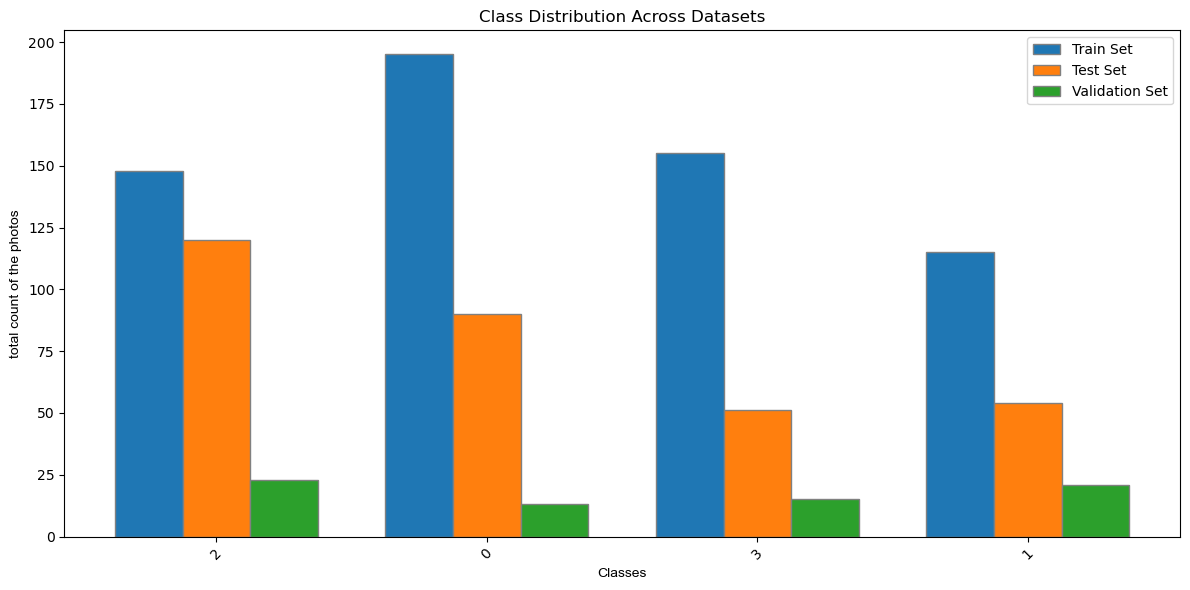

In [10]:

class_names = list(counting_training.keys())
counts = {
    "Train Set": list(counting_training.values()),
    "Test Set": list(counting_test.values()),
    "Validation Set": list(counting_val.values())
}

width_bar = 0.25
x_positions = np.arange(len(class_names))


plt.figure(figsize=(12, 6))

for i, (label, dataset_counts) in enumerate(counts.items()):
    plt.bar(
        x_positions + i * width_bar, 
        dataset_counts, 
        width=width_bar, 
        label=label, 
        edgecolor='grey'
    )

def customize_plot():
    gca = plt.gca()
    gca.set_xlabel('Classes', fontproperties='Arial')
    gca.set_ylabel('total count of the photos', fontproperties='Arial')
def set_x_tick_labels(x_positions, width_bar, class_names):
    plt.xticks(x_positions + width_bar, class_names, rotation=45)

def set_title_and_legend():
    plt.title('Class Distribution Across Datasets')
    plt.legend()

def display_plot():
    plt.tight_layout()
    plt.show()

# Customize and display plot
customize_plot()
set_x_tick_labels(x_positions, width_bar, class_names)
set_title_and_legend()
display_plot()



_Above, we can see from the graph that the class distribution across the test, train, and validation sets is consistent. Hence, we don't need to apply imbalance techniques._ 

In [11]:
class_names = training_data.class_names
print(class_names)

['adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib', 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa', 'normal', 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa']


_visualising the images_

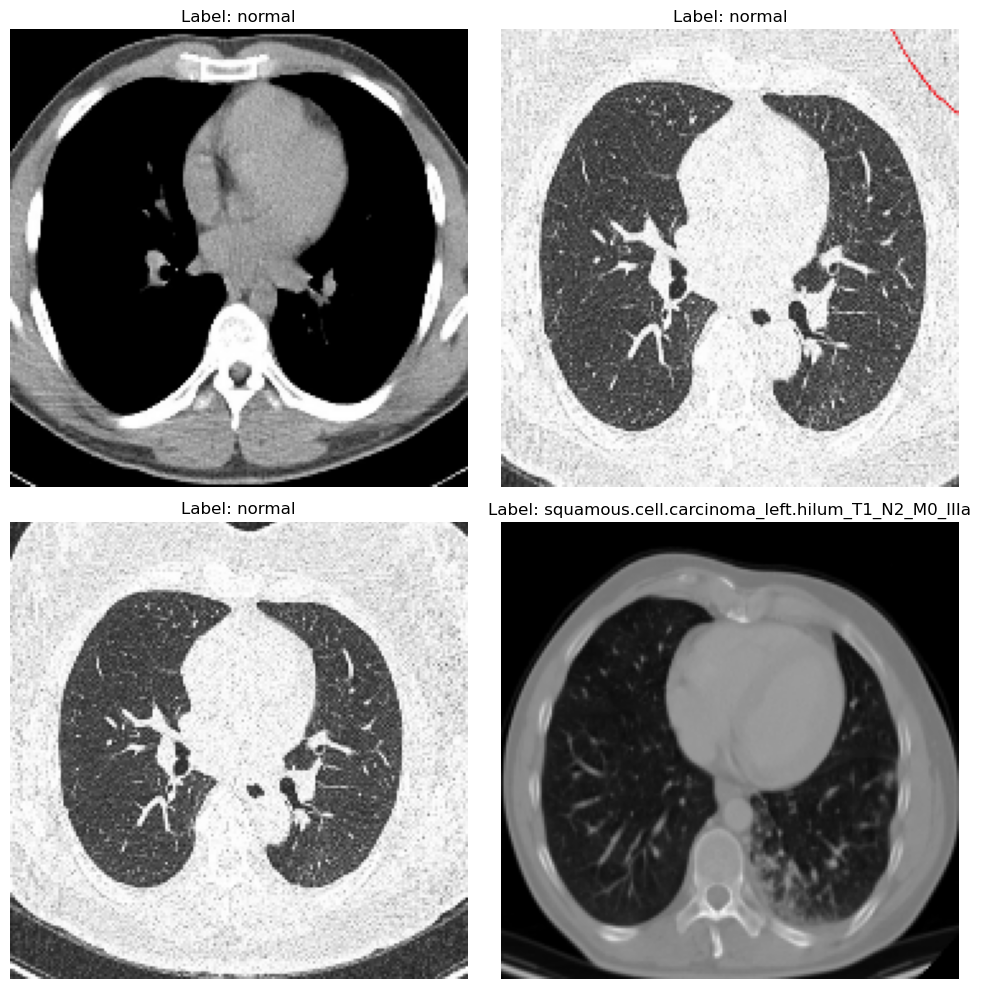

In [12]:

batch = next(iter(training_data.take(1)))

images, labels = batch

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

for i, (image, label) in enumerate(zip(images[:4], labels[:4])):
    row = i // 2
    col = i % 2
    
    axs[row, col].imshow(image.numpy().astype("uint8"))
    
    axs[row, col].set_title(f"Label: {class_names[label.numpy()]}")
    
    axs[row, col].axis('off')

fig.tight_layout()

plt.show()


_The below function speeds up data loading after the first epoch, ensures randomness for efficient computation, minimizes latency, and enhances overall performance._

In [13]:
training_data = training_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
val_data = val_data.cache().prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

# CNN Nueral network:
1) Alpha value
2) Number of neurons per layer
3) filter size
4) droupout rate
5) kernal size
6) pooling layer size

__The above mentioned are called hyperparameters. And by experimenting with different values of these hyperparameters, we can get a good performng model. To do that we use KERAS Tuner.__

***# KERAS TUNER:

__keras tuner helps to search for the best hyperparameter values in order to get good accuracy for the model.__

__We do that by the following way:__ 

* In the model we store different values for each hyperparameter in the model definition.
* We have to define a search space. By specifying the different range of valus for each             hyperparametrs.
* So, tuner will select different combinations of values from each hyperparametr and runs or trains the model. Its Like an expirement.  
* Lastly, tuner will return the best model that has good accuracy in both train and validation.


_In the defined model I used preprocessing thecnique which normalises pixel values to the range 0 to 1 and also we defined input shape of 180*180 with 3 for rgb color channels which are (red, blue and green), which is a good and standerd appraoch in the image data_

In [2]:
def training_loop(km):
    nuerons = km.Choice('units', 
                        values=[32, 64, 128, 256, 512])
    
    alpha_values = km.Choice('learning_rate', 
                                  values=[1e-2, 1e-3, 1e-4, 1e-5])
    
    
    twopooling_num = km.Choice('pooling_size', 
                             values=[2, 3])
    
    different_sizefilters = km.Choice('conv_filters', 
                            values=[32, 64, 96, 128], 
                            default=64)
    
    twokernal_num = km.Choice('conv_kernel_size', 
                                values=[3, 5])
    
    different_dropoutsrates = km.Choice('dropout_rate', 
                             values=[0.2, 0.3, 0.4, 0.5])
    


    model = Sequential([
        Rescaling(1./255, input_shape=(180, 180, 3)),
        
        Conv2D(different_sizefilters, 
               kernel_size=twokernal_num, 
               activation='relu', 
               padding='same'),
        MaxPooling2D(pool_size=twopooling_num),
        Dropout(rate=different_dropoutsrates),
        
        Conv2D(different_sizefilters * 2, 
               kernel_size=twokernal_num, 
               activation='relu', 
               padding='same'),
        MaxPooling2D(pool_size=twopooling_num),
        Dropout(rate=different_dropoutsrates),
        
        
        Flatten(),
        Dense(units=nuerons, activation='relu'),
        Dropout(rate=different_dropoutsrates),
        Dense(units=nuerons // 2, activation='relu'),
        Dropout(rate=different_dropoutsrates / 2),
        
        Dense(4, activation='softmax')
    ])

    model.compile(
        optimizer=keras.optimizers.Adam(
            learning_rate=alpha_values,
        ),
        loss=keras.losses.SparseCategoricalCrossentropy(),
        metrics=['accuracy']
    )
    
    return model

This performs hypertuning

In [20]:
search = kk.Hyperband(
    training_loop,
    max_epochs=25,
    directory='trained_cnn',
    seed=5,
    project_name='Brain',
    objective='val_accuracy', 
    overwrite=True
)


_We used early stopping if a trial or training process's metric is stagnated at the same level for 10 epochs, it will end that trial. This will stop after 10 epochs if there is not much improvement in validation loss._

In [21]:
ewrlier_stopping = tf.keras.callbacks.EarlyStopping(  
    patience=10,  
    min_delta=0.001, 
    verbose=1,  
    mode='max',  
    baseline=None,
    monitor = 'val_loss'
)


_Here tuner running hyperparamter search_

In [22]:
search.search(training_data, epochs=25, validation_data=val_data, callbacks=[ewrlier_stopping])


Trial 30 Complete [00h 28m 16s]
val_accuracy: 0.3194444477558136

Best val_accuracy So Far: 0.8611111044883728
Total elapsed time: 02h 45m 30s


_We got summary of all the trials with different combination values of hyperparameters with their accuracy._

In [23]:
search.results_summary()


Results summary
Results in trained_cnn\Brain
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0016 summary
Hyperparameters:
units: 128
learning_rate: 0.001
pooling_size: 3
conv_filters: 96
conv_kernel_size: 3
dropout_rate: 0.3
tuner/epochs: 25
tuner/initial_epoch: 9
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0013
Score: 0.8611111044883728

Trial 0024 summary
Hyperparameters:
units: 256
learning_rate: 0.001
pooling_size: 2
conv_filters: 64
conv_kernel_size: 3
dropout_rate: 0.2
tuner/epochs: 25
tuner/initial_epoch: 9
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0020
Score: 0.8611111044883728

Trial 0017 summary
Hyperparameters:
units: 512
learning_rate: 0.0001
pooling_size: 2
conv_filters: 96
conv_kernel_size: 5
dropout_rate: 0.2
tuner/epochs: 25
tuner/initial_epoch: 9
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0012
Score: 0.8333333134651184

Trial 0013 summary
Hyperparameters:
units: 128
learning_rate: 0.001
pooling_size: 3
conv_filters: 96
conv

_Add those experiments into a DataFrame. IPython display is used because it formats objects within the DataFrame in a visually professional and structured manner._

In [53]:

def load_json_files(root_directory):
    json_files = glob.glob(root_directory + '/**/*.json', recursive=True)
    return [file for file in json_files if file.endswith('trial.json')]

def extract_data(json_files):
    data = []
    for file in json_files:
        with open(file, 'r') as f:
            trial_data = json.load(f)
            data.append({
                **{key: trial_data['metrics']['metrics'][key]['observations'][0]['value'] for key in ['val_accuracy', 'accuracy', 'val_loss', 'loss']},
                **{key: trial_data['hyperparameters']['values'][key] for key in ['dropout_rate', 'conv_kernel_size', 'conv_filters', 'pooling_size', 'learning_rate']}
            })
    return data

def create_dataframe(data):
    return pd.DataFrame(data)

root_directory = 'trained_cnn/Brain'
json_files = load_json_files(root_directory)
data = extract_data(json_files)
df = create_dataframe(data)

display(df)


,val_accuracy,accuracy,val_loss,loss,dropout_rate,conv_kernel_size,conv_filters,pooling_size,learning_rate
0,[0.3888888955116272],[0.3752039074897766],[1.335278034210205],[1.2633968591690063],0.4000,3,32,2,0.0000
1,[0.5],[0.4518760144710541],[1.0623031854629517],[1.134215235710144],0.3000,5,32,2,0.0010
2,[0.3194444477558136],[0.27406197786331177],[1.390183687210083],[8.510930061340332],0.5000,3,128,3,0.0100
3,[0.6944444179534912],[0.6753670573234558],[0.8684313297271729],[0.8187205791473389],0.2000,5,96,2,0.0001
4,[0.4305555522441864],[0.38172921538352966],[1.359545111656189],[1.2924354076385498],0.4000,5,32,2,0.0001
5,[0.6666666865348816],[0.6052201986312866],[0.8209307789802551],[0.9608822464942932],0.3000,3,96,3,0.0010
6,[0.4027777910232544],[0.3768352270126343],[1.3639686107635498],[1.2842247486114502],0.5000,3,64,2,0.0001
7,[0.375],[0.41435563564300537],[1.330651879310608],[1.2322779893875122],0.4000,3,128,2,0.0000
8,[0.5138888955116272],[0.5171288847923279],[0.9832247495651245],[1.062788486480713],0.3000,3,128,2,0.0010
9,[0.3194444477558136],[0.30831974744796753],[1.3772071599960327],[1.3950228691101074],0.5000,5,96,2,0.0100


_This is a vital step because we are evaluating our best model parameters on the test dataset to obtain test accuracy, which provides an honest measure since the model is evaluated on unseen data._

In [67]:
cnn = training_loop(search.get_best_hyperparameters(1)[0])
cnn.fit(testesting_data, epochs=25)

Epoch 1/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 665ms/step - accuracy: 0.2796 - loss: 1.5566
Epoch 2/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 672ms/step - accuracy: 0.4889 - loss: 1.1700
Epoch 3/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 684ms/step - accuracy: 0.5685 - loss: 0.9672
Epoch 4/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 690ms/step - accuracy: 0.6836 - loss: 0.7870
Epoch 5/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 696ms/step - accuracy: 0.7589 - loss: 0.6758
Epoch 6/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 695ms/step - accuracy: 0.7793 - loss: 0.5677
Epoch 7/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 699ms/step - accuracy: 0.8560 - loss: 0.3683
Epoch 8/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 694ms/step - accuracy: 0.8207 - loss: 0.4254
Epoch 9/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 701ms/step - accuracy: 0.9023 - loss: 0.3010
Epoch 10/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 726ms/step - accuracy: 0.9160 - loss: 0.2132
Epoch 11/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 700ms/step - accuracy: 0.9371 - loss: 0.2143
Epoch 12/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 705ms/step

CONCLUSION:

Pros:
1) In our implementation, we achieved the best validation score of 86%, and in test evaluation, we achieved 99.6%, which is very impressive.
2) This systematic approach really helped in achieving better metric results on the unseen dataset, which is the test dataset.
3) This implementation will greatly help hospitals cut costs and manage patients affected by chest cancer.

CONS:
1) Overall, the limitation of the proposed implementation is that the training data is insufficient. As a result, it is still not a perfect model to implement in hospitals.
2) This proposed model lacks classes or features; therefore, it is limited to predicting only the cancer type that the model trained on. However, in reality, patients may be admitted with various kinds of chest cancers, which is a significant disadvantage of this proposed implementation.